In [1]:
from scipy.fft import rfft, fft, fftshift, ifft, fftn, ifftn
from scipy.signal import fftconvolve, kaiser
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

def freq2time(hf, axis=0):
    return hf.shape[axis] * ifft(hf, axis=axis)

def time2freq(ht, axis=0):
    return fft(ht, axis=axis) / ht.shape[axis]

In [2]:
import pickle
with open ("reproduce_0/filters_full_0.pkl", "rb") as fh:
    hf_time = pickle.load(fh)
    
wavefield = time2freq(freq2time(hf_time,axis=1),axis=0)
nchan = wavefield.shape[1]
start_chan = nchan*5//8
end_chan = nchan*7//8
noise = wavefield[:,start_chan:end_chan]
print(f'start={start_chan} end={end_chan} size={np.size(noise)}')
variance = np.mean(np.abs(noise)**2)
rms = np.sqrt(variance)
print(f'rms={rms} log10(rms)={np.log10(rms)}')

power=np.abs(fftshift(wavefield))**2
power_re=np.abs(np.real(fftshift(wavefield)))**2
power_im=np.abs(np.imag(fftshift(wavefield)))**2

start=2560 end=3584 size=479232
rms=0.4785162005239152 log10(rms)=-0.32010335427368336


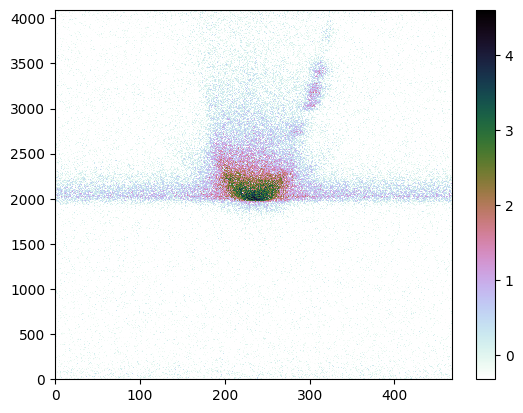

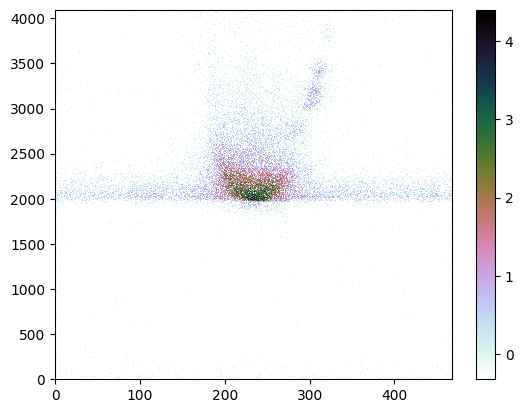

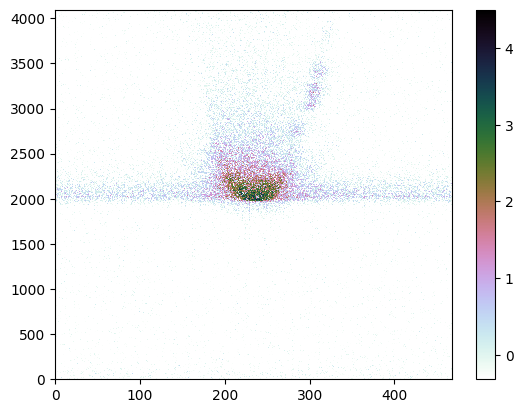

In [3]:
plotthis = np.log10(power)
plt.imshow(plotthis.T, aspect="auto", origin="lower", cmap="cubehelix_r", vmin=np.log10(rms), interpolation='none')
plt.colorbar()
plt.show()

plotthis = np.log10(power_re)
plt.imshow(plotthis.T, aspect="auto", origin="lower", cmap="cubehelix_r", vmin=np.log10(rms), interpolation='none')
plt.colorbar()
plt.show()

plotthis = np.log10(power_im)
plt.imshow(plotthis.T, aspect="auto", origin="lower", cmap="cubehelix_r", vmin=np.log10(rms), interpolation='none')
plt.colorbar()
plt.show()

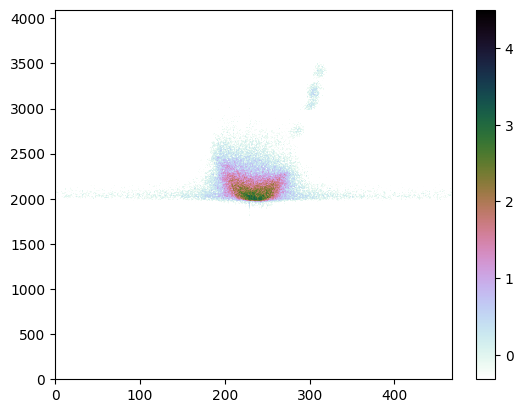

In [4]:
plt.imshow(plotthis.T, aspect="auto", origin="lower", cmap="cubehelix_r", vmin=np.log10(rms))
plt.colorbar()

ndelay=4096 ntime=468
bias=0.6869647145006686


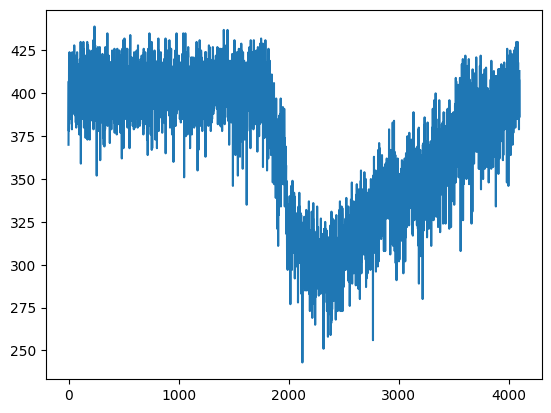

[0.02039478 0.52566673]


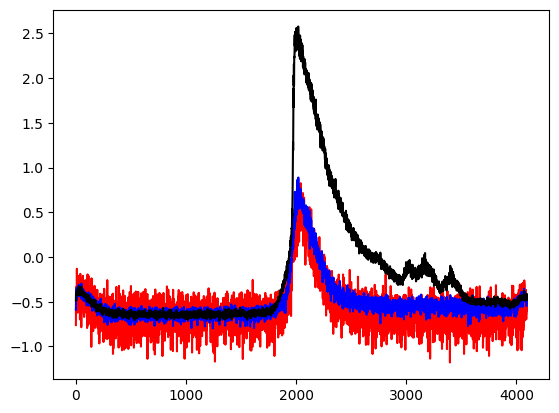

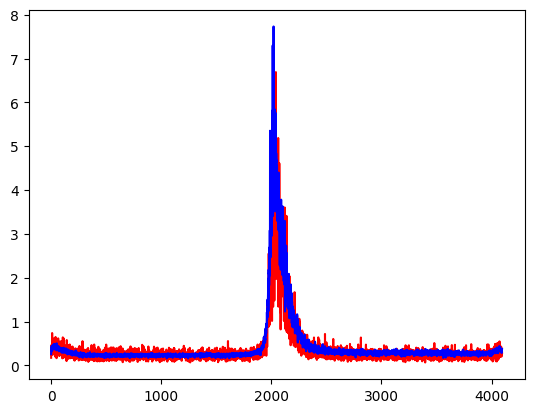

In [43]:
ntime = power.shape[0]
ndelay = power.shape[1]
print(f"ndelay={ndelay} ntime={ntime}")
delay_power = np.mean(power, axis=0)

width=5
threshold=2.0

left_edge = power[0:width]
right_edge = power[(ntime-width):]

sum_edge = np.sum(left_edge, axis=0) + np.sum(right_edge, axis=0)
count_edge = np.count_nonzero(left_edge, axis=0) + np.count_nonzero(right_edge, axis=0)
edge_power = sum_edge / count_edge

bias = 1.0 - threshold * np.exp(-threshold) / (1.0 - np.exp(-threshold))
print(f"bias={bias}")

masked_power = edge_power
for i in range(10):
    masked = np.heaviside(threshold * masked_power - power, 1) * power
    sum_masked = np.sum(masked,axis=0)
    count_masked = np.count_nonzero(masked,axis=0)
    masked_power = sum_masked / (bias * count_masked)

plt.plot(count_masked)    
plt.show()

print(power[ntime-2:,0])
plt.plot(np.log10(edge_power),color='red')
plt.plot(np.log10(masked_power),color='blue')
plt.plot(np.log10(delay_power),color='black')
plt.show()

plt.plot(edge_power,color='red')
plt.plot(masked_power,color='blue')

In [6]:
def smooth_2d_array(array, duty_cycle, beta):
    # Create the Kaiser window
    ashape = np.asarray(array.shape)
    wshape = np.round(ashape * duty_cycle)
    print(f'wshape={wshape}')
    kernel = np.outer(kaiser(wshape[0], beta), kaiser(wshape[1], beta))
    kernel /= np.sum(kernel)  # Normalize the kernel

    # Convolve the array with the kernel
    smoothed_array = fftconvolve(array, kernel, mode='same')

    return smoothed_array

wshape=[ 23. 205.]


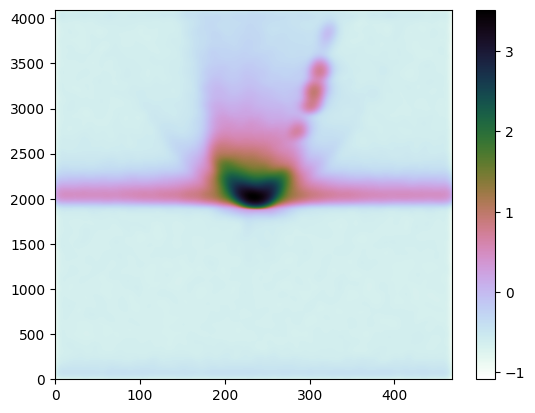

In [7]:
smpow = smooth_2d_array (power, 0.05, 6)
plotthis = np.log10(smpow)
plt.imshow(plotthis.T, aspect="auto", origin="lower", cmap="cubehelix_r")
plt.colorbar()

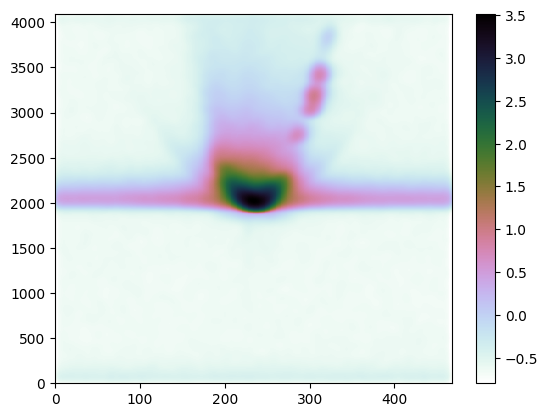

In [8]:
plotthis = np.log10(smpow)
plt.imshow(plotthis.T, aspect="auto", origin="lower", cmap="cubehelix_r", vmin=np.log10(rms/3), interpolation='none')
plt.colorbar()

In [9]:
def complex_threshold(x: np.ndarray, threshold: float):
    """
    Any value with abs(x) < threshold is set to zero
    """
    out = np.heaviside(np.abs(x) - threshold, 1) * x
    nonz = np.count_nonzero(out)
    sz = np.size(out)
    print(f"complex_threshold: zero={(sz-nonz)*100.0/sz} %")

    return out

complex_threshold: zero=50.069642678285255 %


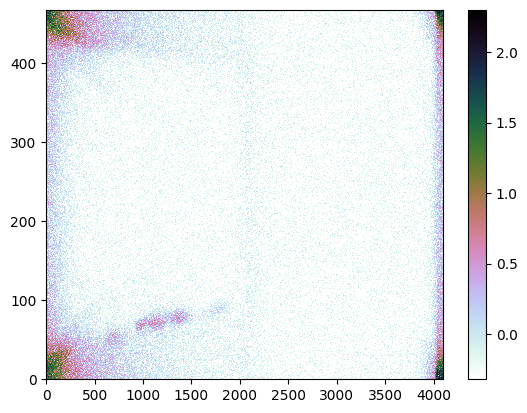

In [10]:
temp=complex_threshold(wavefield, rms)
plotthis = np.log10(np.abs(temp)+rms*1e-4)
plt.imshow(plotthis, aspect="auto", origin="lower", cmap="cubehelix_r", vmin=np.log10(rms), interpolation='none')
plt.colorbar()

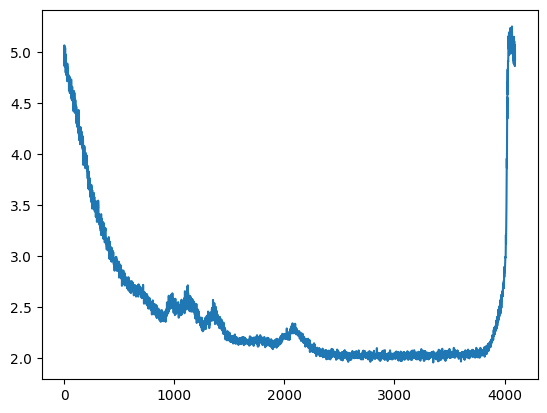

<Figure size 640x480 with 0 Axes>

In [11]:
wsum1=np.log10(np.sum(np.abs(wavefield)**2,axis=0))
plt.plot(wsum1)
plt.show()
plt.clf()

In [12]:
print(wavefield[0,0])

(-55.15012385595443+31.941876171370794j)


In [13]:
print(np.max(np.abs(wavefield)))

199.6405523022444


In [14]:
wavefield[0,0]=0
wavefield.shape

(468, 4096)

In [15]:
hf_time = time2freq(freq2time(wavefield,axis=0),axis=1)

In [16]:
print(np.max(np.abs(hf_time)))

2.476725216876847


In [17]:
hft = np.ones_like(hf_time)

In [18]:
h = freq2time(time2freq(hft,axis=0),axis=1)

In [19]:
print(h)

[[4096.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 ...
 [   0.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]]


In [20]:
        h_time_delay = np.zeros_like(hf_time)
        h_time_delay[:,0] = 4096
        h_doppler_delay = fft(h_time_delay, axis=0) / h_time_delay.shape[0]
print(h_doppler_delay)

[[4096.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 ...
 [   0.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]
 [   0.+0.j    0.+0.j    0.+0.j ...    0.+0.j    0.+0.j    0.+0.j]]


In [21]:
0.2176825252584063**2

0.0473856818028767

In [22]:
0.0473856818028767*4096

194.09175266458297